In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
root_dir = './'
data_dir = root_dir + 'output_archive/200123/'
output_dir = 'output_'
pred_dir = '/predict_1000'

In [38]:
def get_index_depth(dirname, index=[], type='test', error='RMSE'):
    df = pd.read_csv(dirname + '/error_compare.txt')
    df = df[df['type']==type]
    if len(index) is not 0:
        df = df.loc[index]
    index = df['index'].astype(str).values
    depth = np.array(df['{} depth'.format(error)])
    mean_depth = np.mean(depth)
    depth = np.append(depth, mean_depth)
    index = np.append(index, 'Avg')
    return index, depth

In [39]:
def get_predict(dirname, index=[], type='test', error='RMSE'):
    df = pd.read_csv(dirname + '/error_compare.txt')
    df = df[df['type']==type]
    if len(index) is not 0:
        df = df.loc[index]
    predict = np.array(df['{} predict'.format(error)])
    mean_predict = np.mean(predict)
    predict = np.append(predict, mean_predict)
    return predict

In [10]:
def get_list_dir(list_compares, data_dir, output_dir, pred_dir):
    list_dir = []
    for dir_name in list_compares:
        list_dir.append(data_dir + output_dir + dir_name + pred_dir)
    return list_dir

In [6]:
def get_list_pred(list_dir):
    list_pred = []
    for directory in list_dir:
        pred = get_predict(directory)
        list_pred.append(pred)
    return list_pred

In [47]:
def gen_graph(label, depth, list_pred, list_compares, comp_name):
    list_color = ['blue', 'orange', 'lightgreen', 'lightblue', 'red']
    list_bar = []
    list_legend = ['depth']
    list_legend.extend(list_compares)

    if comp_name is not '':
        comp_name = '_' + comp_name

    idx = np.array(range(len(label)))
    width = 0.8 / len(list_legend)

    plt.figure()
    list_bar.append(plt.bar(idx-width, depth, width=width, align='edge', tick_label=label, color=list_color[0]))
    for i, pred in enumerate(list_pred):
        list_bar.append(plt.bar(idx+width*i, pred, width=width, align='edge', tick_label=label, color=list_color[i+1]))
    plt.legend(list_bar, list_legend)
    plt.title('Error Comparison')
#     plt.title('No-fake data learning')
    # plt.xlabel('Test data')
    plt.xlabel('Fake test data')
    plt.ylabel('RMSE [m]')
    plt.tick_params(labelsize=7)
    plt.savefig('errs_cmp{}.pdf'.format(comp_name))

In [11]:
def compare_errors(list_compares, comp_name='', data_dir=data_dir, output_dir=output_dir, pred_dir=pred_dir):
    list_dir = get_list_dir(list_compares, data_dir, output_dir, pred_dir)
    label, depth = get_index_depth(list_dir[0])
    list_pred = get_list_pred(list_dir)
    gen_graph(label, depth, list_pred, list_compares, comp_name)

In [19]:
dir1 = '../output_archive/200122/output_aug/predict_1000/'
dir2 = '../output_archive/200123/output_aug/predict_1000/'

In [40]:
index=[44, 45, 46, 47]
label, depth = get_index_depth(dir1, index)
label

array(['44', '45', '46', '47', 'Avg'], dtype=object)

In [41]:
pred1 = get_predict(dir1, index)
pred2 = get_predict(dir2, index)

In [42]:
pred1

array([0.00078355, 0.00108117, 0.0006136 , 0.00083125, 0.00082739])

In [44]:
list_pred = [pred1, pred2]
list_pred

[array([0.00078355, 0.00108117, 0.0006136 , 0.00083125, 0.00082739]),
 array([0.00143739, 0.00158865, 0.00117359, 0.00144867, 0.00141207])]

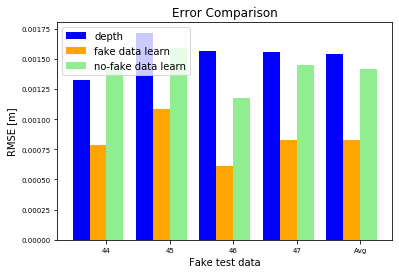

In [48]:
gen_graph(label, depth, list_pred, ['fake data learn', 'no-fake data learn'], 'FakeLearn')